In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [8]:
df = sns.load_dataset("iris")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters=len(df["species"].unique()))

In [13]:
kmeans.fit(df.iloc[:, :-1])

KMeans(n_clusters=3)

In [14]:
df["pred"] = kmeans.predict(df.iloc[:, :-1])

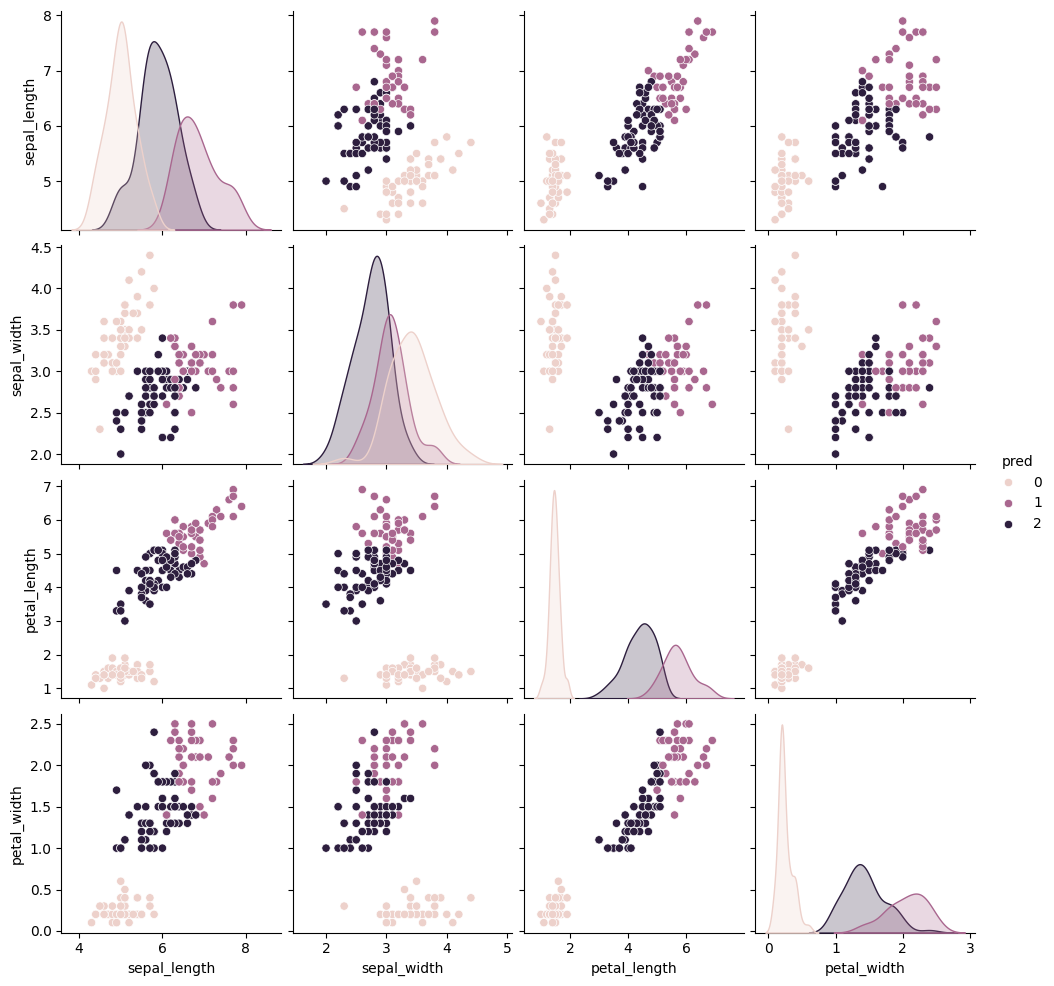

In [15]:
sns.pairplot(data=df, hue="pred")

In [16]:
weights = list()
for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df.iloc[:,:-2])
    weights.append(kmeans.inertia_)

<Axes: >

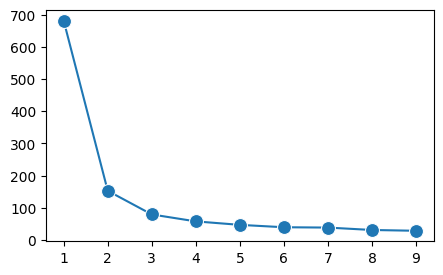

In [17]:
plt.figure(figsize=(5,3))
sns.lineplot(x=range(1,10), y=weights, marker='o', markersize=10)

In [18]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=None)

In [27]:
X = pca.fit_transform(df.iloc[:, :-2])

In [36]:
y = df["species"]

In [37]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [38]:
np.cumsum(pca.explained_variance_ratio_)

array([0.92461872, 0.97768521])

In [39]:
pca = PCA(n_components=0.95)
X = pca.fit_transform(df.iloc[:, :-2])
pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)

array([0.92461872, 0.97768521])

In [40]:
from sklearn.model_selection import train_test_split

In [49]:
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf = RandomForestClassifier(random_state=42)
rf.fit(train_x, train_y)
rf.score(valid_x, valid_y)

0.9

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)
knn.score(valid_x, valid_y)

0.9666666666666667

## PCA
### PCA 또한 거리기반 연산이므로 입력데이터에 대한 스케일링과 onehot 인코딩은 필수!!!